In [2]:
# https://archive.ics.uci.edu/dataset/292/wholesale+customers
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# variable information 
print(wholesale_customers.variables) 


               name     role         type demographic description units  \
0           Channel  Feature  Categorical        None        None  None   
1            Region   Target  Categorical        None        None  None   
2             Fresh  Feature      Integer        None        None  None   
3              Milk  Feature      Integer        None        None  None   
4           Grocery  Feature      Integer        None        None  None   
5            Frozen  Feature      Integer        None        None  None   
6  Detergents_Paper  Feature      Integer        None        None  None   
7        Delicassen  Feature      Integer        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7             no  


In [14]:
x = X.iloc[:,:5]
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)
from sklearn.cluster import KMeans

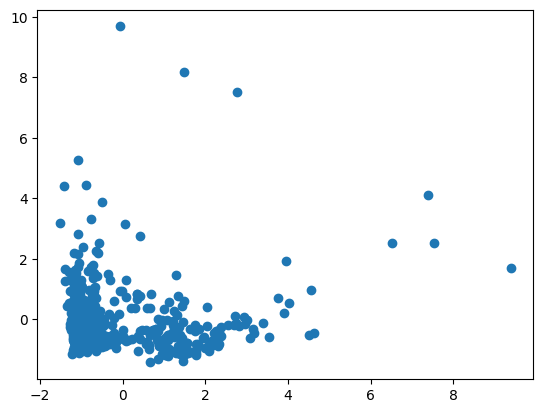

In [24]:
# 시각화를 통해 군집모양이 나오는지 확인
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
x_scaled_pca = pca.fit_transform(x_scaled)
plt.scatter(x_scaled_pca[:,0], x_scaled_pca[:,1])

In [53]:
# 클러스터의 개수는 5개로 시작
km = KMeans(n_clusters=5)
km.fit(x_scaled)
# 예측
print(km.labels_)
X['Cluster'] = km.labels_
X.head()

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 4 1 1 1 0 0 1 4 0 0 0 4 0 1 4
 1 1 4 4 0 1 1 1 1 1 3 1 1 0 0 4 1 4 0 1 1 0 0 1 3 1 1 0 1 0 1 0 0 4 4 0 1
 1 4 0 1 0 0 0 1 1 4 1 3 3 4 0 4 0 0 1 2 1 0 1 0 0 0 1 1 1 2 0 0 1 1 1 1 0
 1 4 0 0 0 0 0 4 0 0 0 0 1 4 2 4 1 0 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 1 0 0
 0 4 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 4 0 0 0 0 2 0 2 0
 0 0 0 1 1 4 0 0 1 0 4 4 1 0 0 1 1 4 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 4 0 0 0 0 4 0 4 4 4 0 0 0 1 0 0 0 0 0 1 0 4 0 4 0 0 4
 4 0 0 4 0 1 1 1 4 1 0 0 0 0 4 0 0 4 4 0 1 0 1 4 4 4 4 0 4 0 4 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 4 1 0 0 1 0 0 0 1 0 0 0 0 4 2 0 0 4 0 0 1 4
 1 4 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 4 1 0 0 0 0 0 0 0 1 0 0 4 0
 4 4 0 1 0 0 1 4 0 1 4 4 4 0 1 0 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 4 4 4 4 0 4
 1 1 0 0 0 0 4 0 1 1 0 1 0 0 1 4 1 1 4 0 4 0 0 0 4 0 0 0 4 4 1 0 0]


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,12669,9656,7561,214,2674,1338,1
1,2,7057,9810,9568,1762,3293,1776,1
2,2,6353,8808,7684,2405,3516,7844,1
3,1,13265,1196,4221,6404,507,1788,0
4,2,22615,5410,7198,3915,1777,5185,1


<Axes: xlabel='Milk', ylabel='Delicassen'>

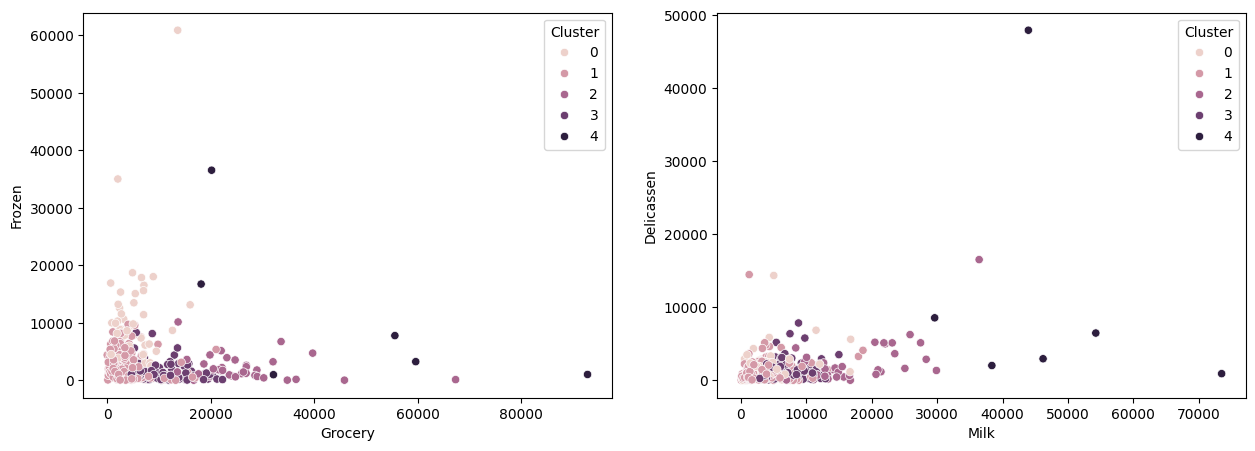

In [43]:
# 시각화
# Grocery	Frozen  Cluster별로구분
# Milk Delicassen
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=X, x='Grocery', y='Frozen', hue='Cluster')

plt.subplot(1,2,2)
sns.scatterplot(data=X, x='Milk', y='Delicassen', hue='Cluster')

<Axes: xlabel='Milk', ylabel='Delicassen'>

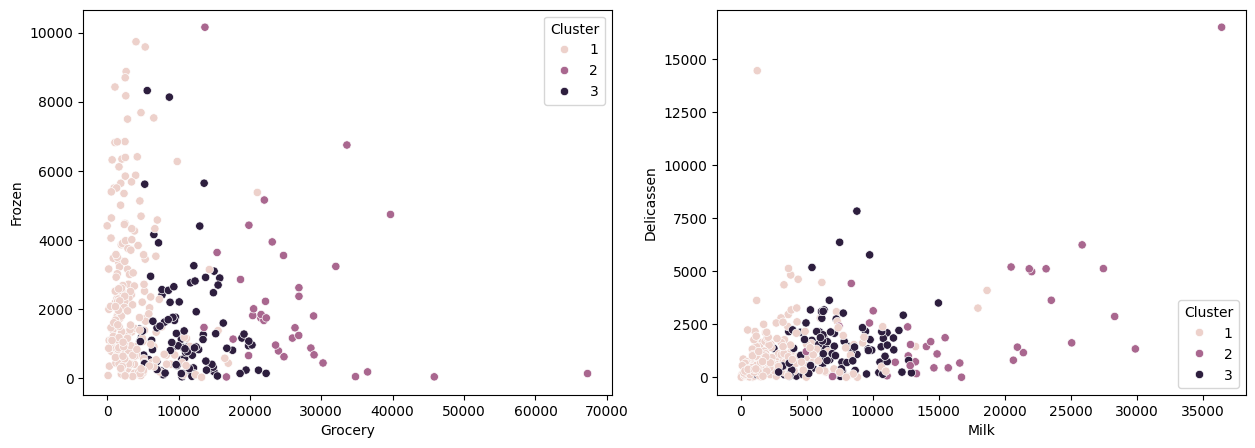

In [49]:
# 클러스터를 임의로 구성해서 동떨어져 있는 클러스터를 제외하고 다시 시각화
mask = ((X['Cluster'] == 0) | (X['Cluster'] == 4))
ndf = X[~mask]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=ndf, x='Grocery', y='Frozen', hue='Cluster')

plt.subplot(1,2,2)
sns.scatterplot(data=ndf, x='Milk', y='Delicassen', hue='Cluster')

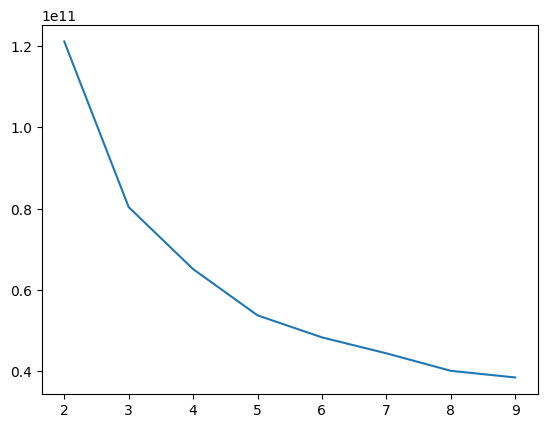

In [54]:
result = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    result.append(km.inertia_)
plt.plot(range(2,10), result)    

- DBSCAN
    - 데이터의 분포의 형태에 관계없이 밀도기반으로 군집을 찾는다
    - KMean처럼 미리 클러스터의 수를 정하지 않는다
    - esp : 포인트 사이의 거리의 임계값 두 포인트가 같은 군집이 되려면 얼마나 가까운지 
    - 랜덤한 포인트에서 시작 그 주변(R == esp)에 있는 포인트를 찾는다
    - min_samples : 군집의 중심이 되기 위한 취소한의 이웃의 수
    - 해당 포인트가 핵심포인트(이웃의 수가 min_samples 이상)라면, 해당 포인트와 이웃포인트를 하나의 군집
    - 반복하면서 클러스터를 찾는다

cluster
 1    201
-1    194
 0     32
 3      8
 2      5
Name: count, dtype: int64


(0.0, 20000.0)

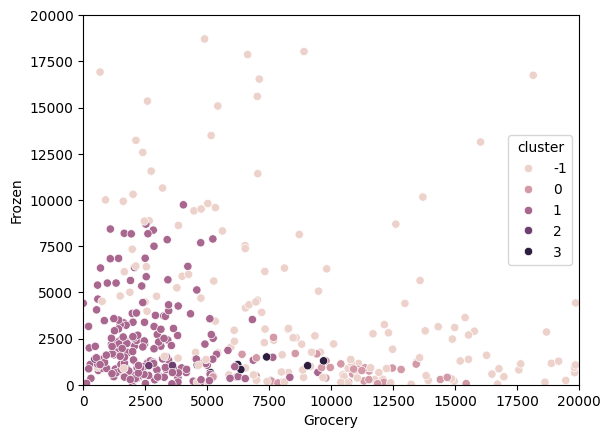

In [82]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

wholesale_customers = fetch_ucirepo(id=292)   
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 모델 생성 및 적합
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# 클러스터 결과 확인
X['cluster'] = y_dbscan
print(X['cluster'].value_counts())  # 각 군집의 포인트 수 확인

# 클러스터링 결과 시각화 (2개의 주요 특성으로 시각화)
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, cmap='plasma', edgecolor='k')
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("DBSCAN Clustering of Wholesale Customers")
# plt.show()

sns.scatterplot(data=X, x='Grocery', y='Frozen',hue='cluster')
plt.xlim(0,20000)
plt.ylim(0,20000)